***LIBRARIES***

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install statsmodels

In [ ]:
!pip install plotly
!pip install folium
!pip install nltk
!pip install textblob
!pip install streamlit
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.0 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import IsolationForest
from folium.plugins import HeatMap
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import pandas as pd

df = pd.read_csv('/content/my final dataset.csv')


In [ ]:
display(df.head())

,SL NO,Hotel_name,Location,Price,Discount,Total Rating,Rating(out of 5),Hotel ID,Booking ID,Booking Status,Payment Mode (online/offline),No of Guest,check in time,check in status,Total Price,Customer ID,Review,URL
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819,65%,104,4,194527,XYZ4300,confirmed,online,2,3:00pm,completed,3000,CUST1128,"Poor service, not worth the price.",https://www.oyorooms.com/194527
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702,65%,410,5,45105,XYZ4301,confirmed,online,2,12:00pm,completed,5000,CUST1448,"Poor service, not worth the price.",https://www.oyorooms.com/45105
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289,64%,879,5,110286,XYZ4302,confirmed,online,2,12:00pm,completed,3000,CUST1088,"Poor service, not worth the price.",https://www.oyorooms.com/110286
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094,66%,75,5,113328,XYZ4303,confirmed,online,2,5:00pm,completed,3500,CUST1437,"Poor service, not worth the price.",https://www.oyorooms.com/113328
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656,65%,686,3,114912,XYZ4304,confirmed,online,2,6:00pm,completed,3500,CUST1319,Room was not clean upon arrival.,https://www.oyorooms.com/114912


In [ ]:
df.tail()

,SL NO,Hotel_name,Location,Price,Discount,Total Rating,Rating(out of 5),Hotel ID,Booking ID,Booking Status,Payment Mode (online/offline),No of Guest,check in time,check in status,Total Price,Customer ID,Review,URL
786,788,OYO Premium 346 Connaught Place 2,Connaught Place,2049,67%,65,3,196150,XYZ5086,confirmed,online,1,4:30pm,completed,5000,CUST1263,"Poor service, not worth the price.",https://www.oyorooms.com/196150
787,789,OYO Rooms 167 Safdarjung Extension,Safdarjung,2449,67%,17,3,196753,XYZ5087,confirmed,online,1,3:00pm,completed,3500,CUST1200,Check-in process was slow and frustrating.,https://www.oyorooms.com/196753
788,790,OYO Rooms 222 Karol Bagh Metro Station 3,Karol Bagh,4449,73%,28,3,196772,XYZ5088,confirmed,online,1,03:00pm,completed,4500,CUST1391,"Poor service, not worth the price.",https://www.oyorooms.com/196772
789,791,OYO Rooms 398 South Extension 2,South Extension-ll,1899,67%,2,2,198805,XYZ5089,confirmed,offline,1,12:00pm,completed,6500,CUST1464,"Average experience, nothing special.",https://www.oyorooms.com/198805
790,792,OYO Rooms 516 Shakti Vihar Pitampura,Pitampura,2349,67%,913,2,201207,XYZ5090,confirmed,offline,1,12:00pm,completed,4500,CUST1143,"Average experience, nothing special.",https://www.oyorooms.com/201207


In [ ]:
df.shape

(791, 18)

In [ ]:
df.describe()

,SL NO,Price,Total Rating,Rating(out of 5),Hotel ID,No of Guest,Total Price
count,791.00000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,395.03287,1887.429836,624.225032,3.604298,131003.829330,1.969659,4286.116308
std,228.54249,1045.644528,954.375780,1.177395,70449.240938,0.607205,1532.666827
min,0.00000,449.000000,1.000000,0.000000,85.000000,1.000000,1000.000000
25%,197.50000,1140.000000,62.000000,3.000000,75068.000000,2.000000,3500.000000
50%,395.00000,1599.000000,262.000000,4.000000,113753.000000,2.000000,4250.000000
75%,592.50000,2349.000000,832.500000,5.000000,201234.500000,2.000000,5000.000000
max,792.00000,6849.000000,7398.000000,5.000000,213740.000000,4.000000,15000.000000


***DATA CLEANING***

In [ ]:
display(df.columns)
df.dropna(subset=['Price', 'Rating(out of 5)', 'Total Price', 'Review', 'Booking ID'], inplace=True)

Index(['SL NO', 'Hotel_name', 'Location', 'Price', 'Discount', 'Total Rating',
       'Rating(out of 5)', 'Hotel ID', 'Booking ID', 'Booking Status',
       'Payment Mode (online/offline)', 'No of Guest', 'check in time',
       'check in status', 'Total Price', 'Customer ID', 'Review', 'URL'],
      dtype='object')

In [ ]:
numeric_cols = ['Price', 'Discount', 'Total Rating', 'Rating(out of 5)', 'No of Guest', 'Total Price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df['Payment Mode (online/offline)'] = df['Payment Mode (online/offline)'].fillna('Unknown')
df['Booking Status'] = df['Booking Status'].fillna('Pending')

In [ ]:
df['Discount (%)'] = df['Discount'].astype(str).str.rstrip('%').astype(float)

In [ ]:
df['check in time'] = pd.to_datetime(df['check in time'], errors='coerce')


/tmp/ipython-input-1342133133.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['check in time'] = pd.to_datetime(df['check in time'], errors='coerce')


In [ ]:
df['check in time'] = pd.to_datetime(df['check in time'], errors='coerce')


In [ ]:
df['Expected Price'] = df['Price'] * (1 - df['Discount (%)'] / 100)

**Descriptive Statistics Visualizations**

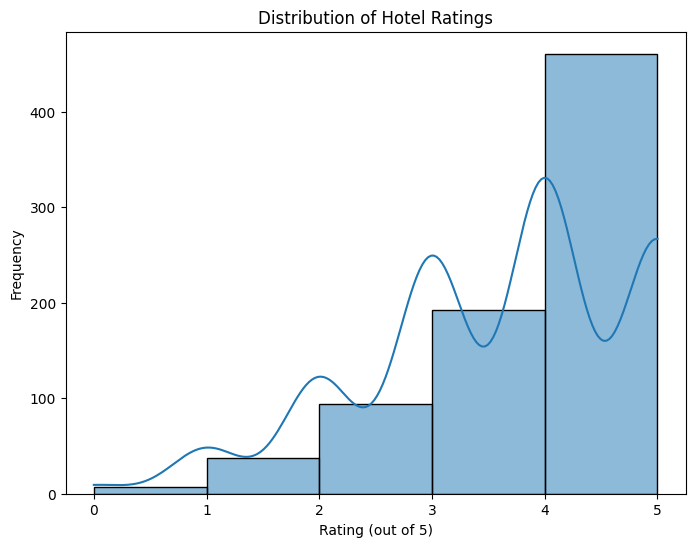

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['Rating(out of 5)'], kde=True, bins=5)
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Frequency')
plt.show()

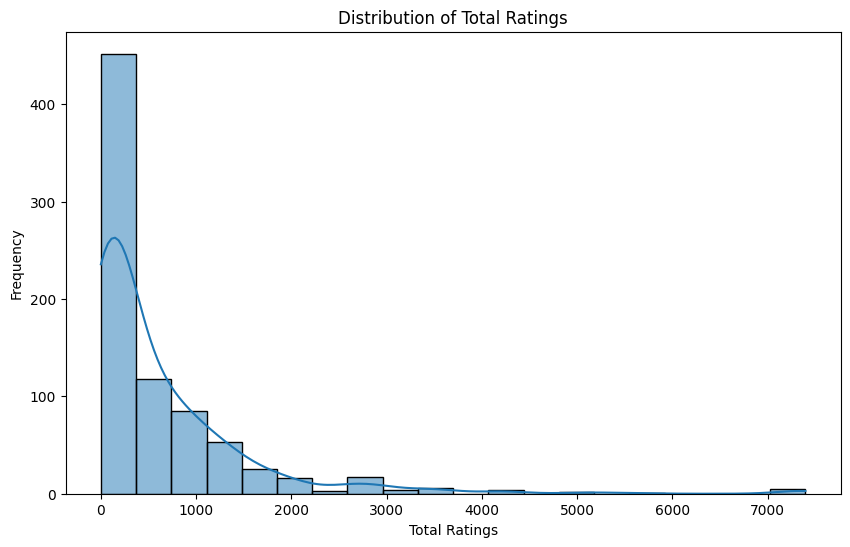

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Rating'], kde=True, bins=20)
plt.title('Distribution of Total Ratings')
plt.xlabel('Total Ratings')
plt.ylabel('Frequency')
plt.show()

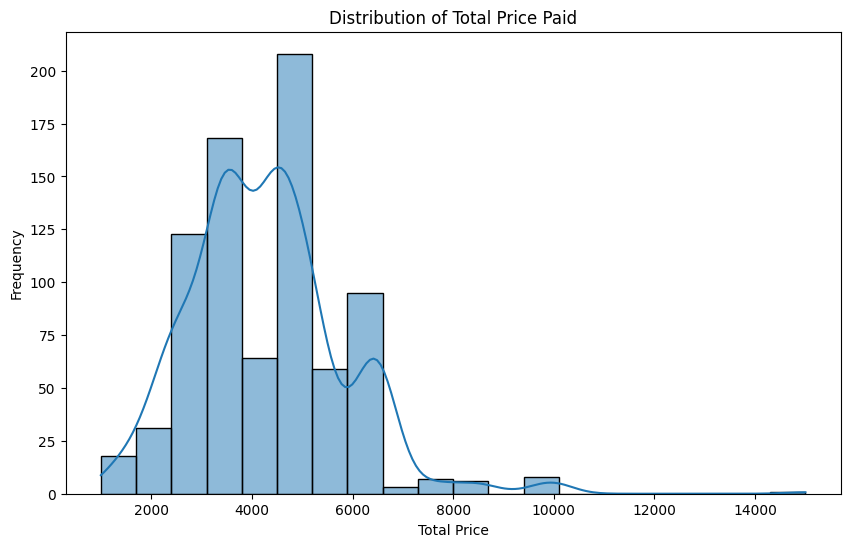

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Price'], kde=True, bins=20)
plt.title('Distribution of Total Price Paid')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

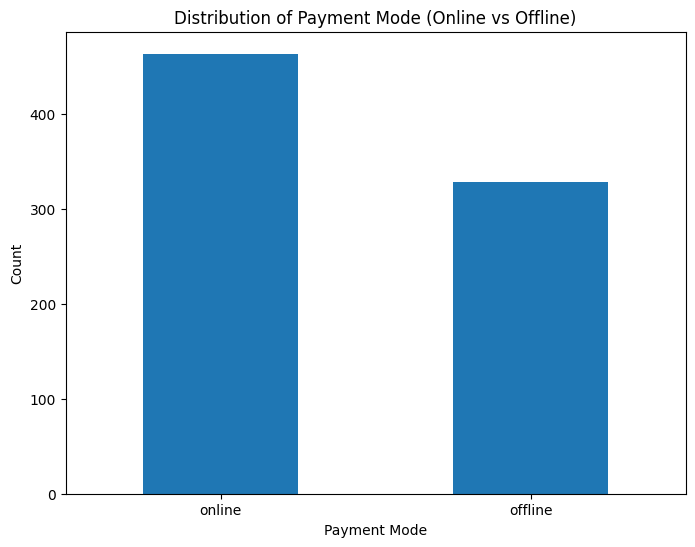

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['Payment Mode (online/offline)'].value_counts().plot(kind='bar')
plt.title('Distribution of Payment Mode (Online vs Offline)')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

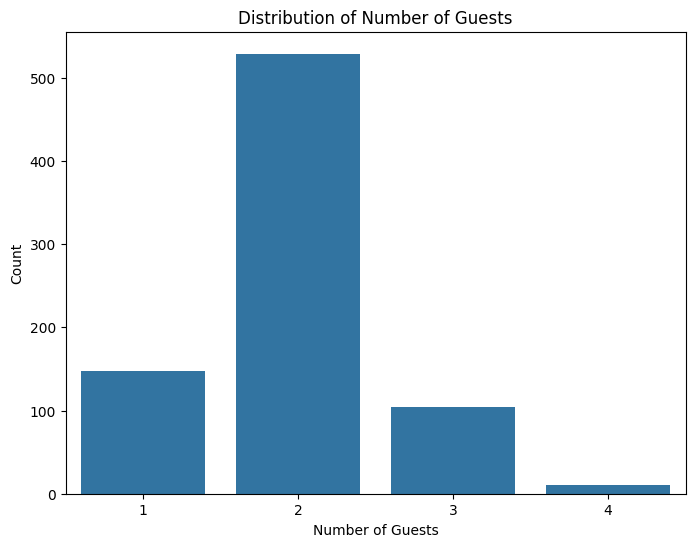

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='No of Guest', data=df)
plt.title('Distribution of Number of Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Count')
plt.show()

**Plotly Express Visualizations**

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='Rating(out of 5)', nbins=5, title='Distribution of Hotel Ratings')
fig.update_layout(xaxis_title='Rating (out of 5)', yaxis_title='Frequency')
fig.show()

In [ ]:
import plotly.express as px

payment_counts = df['Payment Mode (online/offline)'].value_counts().reset_index()
payment_counts.columns = ['Payment Mode', 'Count']
fig = px.bar(payment_counts, x='Payment Mode', y='Count', title='Count of Online vs Offline Payments')
fig.update_layout(xaxis_title='Payment Mode', yaxis_title='Count')
fig.show()

In [ ]:
import plotly.express as px

booking_status_counts = df['Booking Status'].value_counts().reset_index()
booking_status_counts.columns = ['Booking Status', 'Count']
fig = px.pie(booking_status_counts, names='Booking Status', values='Count', title='Booking Status Distribution')
fig.show()

In [ ]:
import plotly.express as px

top_locations = df['Location'].value_counts().head(10).index.tolist()
df_top_locations = df[df['Location'].isin(top_locations)]
fig = px.box(df_top_locations, x='Location', y='Price', title='Price Distribution by Location (Top 10)')
fig.update_layout(xaxis_title='Location', yaxis_title='Price')
fig.show()

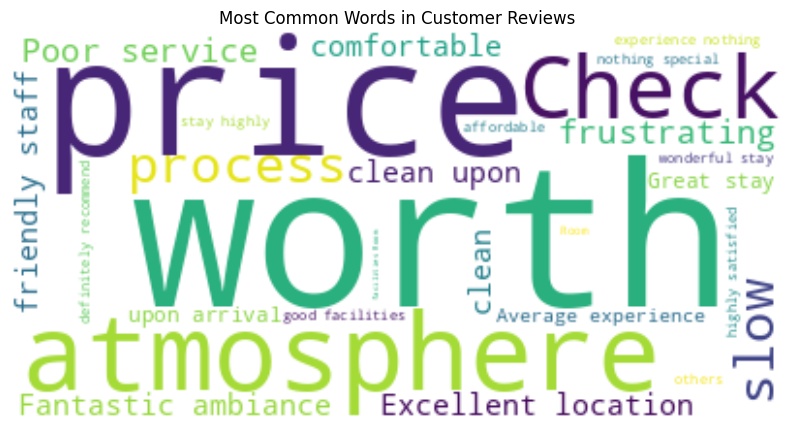

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(review for review in df['Review'].astype(str))
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Customer Reviews')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='Rating(out of 5)', y='Price', title='Price vs Rating Relationship')
fig.update_layout(xaxis_title='Rating (out of 5)', yaxis_title='Price')
fig.show()

## Analyze price anomalies




In [ ]:
df['Price Difference'] = abs(df['Total Price'] - df['Expected Price'])
df['Price Percentage Difference'] = abs((df['Total Price'] - df['Expected Price']) / df['Expected Price']) * 100

price_difference_anomalies = df[df['Price Difference'] > 500]
price_percentage_difference_anomalies = df[df['Price Percentage Difference'] > 20]

display("Price Difference Anomalies (Difference > 500):")
display(price_difference_anomalies)
display("Price Percentage Difference Anomalies (Percentage Difference > 20%):")
display(price_percentage_difference_anomalies)

'Price Difference Anomalies (Difference > 500):'

,SL NO,Hotel_name,Location,Price,Discount,Total Rating,Rating(out of 5),Hotel ID,Booking ID,Booking Status,...,check in time,check in status,Total Price,Customer ID,Review,URL,Discount (%),Expected Price,Price Difference,Price Percentage Difference


'Price Percentage Difference Anomalies (Percentage Difference > 20%):'

,SL NO,Hotel_name,Location,Price,Discount,Total Rating,Rating(out of 5),Hotel ID,Booking ID,Booking Status,...,check in time,check in status,Total Price,Customer ID,Review,URL,Discount (%),Expected Price,Price Difference,Price Percentage Difference


## Analyze guest count anomalies


In [ ]:
mean_guests = df['No of Guest'].mean()
std_guests = df['No of Guest'].std()
threshold_guests = mean_guests + 2 * std_guests
guest_anomalies = df[df['No of Guest'] > threshold_guests]
display("Guest Count Anomalies:")
display(guest_anomalies)

'Guest Count Anomalies:'

,SL NO,Hotel_name,Location,Price,Discount,Total Rating,Rating(out of 5),Hotel ID,Booking ID,Booking Status,...,check in time,check in status,Total Price,Customer ID,Review,URL,Discount (%),Expected Price,Price Difference,Price Percentage Difference
163,163,Flagship White Fort Near Lalbagh Botanical Garden,"Dispensary Rd, Kalasipalya,Bangalore",572,NaN,1762,4,209957,XYZ4463,confirmed,...,2025-09-18 12:00:00,completed,2400,CUST1163,Very affordable with good facilities.,https://www.oyorooms.com/209957,NaN,NaN,NaN,NaN
193,193,Flagship Sr Residency Near CCD,"Block B, Delhi",549,NaN,49,4,209422,XYZ4493,confirmed,...,2025-09-18 12:00:00,completed,4500,CUST1265,Very affordable with good facilities.,https://www.oyorooms.com/209422,NaN,NaN,NaN,NaN
429,429,OYO Hotel Padmavati Near Netaji Subhash Chandr...,"Biswa Bangla Sarani Behind Binany Building, Ch...",1664,NaN,24,4,207111,XYZ4729,confirmed,...,2025-09-18 12:00:00,completed,4500,CUST1335,"Had a wonderful stay, highly satisfied.",https://www.oyorooms.com/207111,NaN,NaN,NaN,NaN
437,437,Collection O Tulsi Palace,", Kolkata",3249,NaN,53,3,208392,XYZ4737,confirmed,...,2025-09-18 12:00:00,completed,3500,CUST1468,Excellent location and friendly staff.,https://www.oyorooms.com/208392,NaN,NaN,NaN,NaN
441,441,Collection o 82136 Elite Stay,AL283 Al block salt lake sector 2 KOLKATA.,3449,NaN,9,4,209183,XYZ4741,confirmed,...,2025-09-18 12:00:00,completed,3000,CUST1209,Very affordable with good facilities.,https://www.oyorooms.com/209183,NaN,NaN,NaN,NaN
445,445,Flagship Ankita Guest House,"Near Gst Bhawan, Kolkata",4299,NaN,137,5,209750,XYZ4745,confirmed,...,2025-09-18 12:00:00,completed,5000,CUST1011,"Average experience, nothing special.",https://www.oyorooms.com/209750,NaN,NaN,NaN,NaN
589,589,OYO Rooms 010 Karol Bagh 1078,"Karol Bagh, New Delhi",3399,NaN,16,5,58640,XYZ4889,confirmed,...,2025-09-18 13:00:00,completed,6500,CUST1263,"Had a wonderful stay, highly satisfied.",https://www.oyorooms.com/58640,NaN,NaN,NaN,NaN
692,692,OYO Rooms 228 Near RK Ashram Metro Station 2,Paharganj,1549,NaN,102,5,210453,XYZ4992,confirmed,...,2025-09-18 14:30:00,completed,4500,CUST1420,"Great stay, very clean and comfortable.",https://www.oyorooms.com/210453,NaN,NaN,NaN,NaN
710,710,OYO Rooms 663 Elahi Bux Road Karol Bagh,Karol Bagh,1699,NaN,278,5,50759,XYZ5010,confirmed,...,2025-09-18 12:22:00,completed,2520,CUST1408,"Average experience, nothing special.",https://www.oyorooms.com/50759,NaN,NaN,NaN,NaN
736,736,OYO Premium 240 Paharganj Near NDLS,Pahar Ganj,1049,NaN,34,1,36830,XYZ5036,confirmed,...,2025-09-18 12:55:00,completed,1450,CUST1001,Excellent location and friendly staff.,https://www.oyorooms.com/36830,NaN,NaN,NaN,NaN


In [ ]:
import nltk
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
display(df[['Review', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review,sentiment_score
0,"Poor service, not worth the price.",-0.5812
1,"Poor service, not worth the price.",-0.5812
2,"Poor service, not worth the price.",-0.5812
3,"Poor service, not worth the price.",-0.5812
4,Room was not clean upon arrival.,-0.3089


In [ ]:
import nltk
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
display(df[['Review', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review,sentiment_score
0,"Poor service, not worth the price.",-0.5812
1,"Poor service, not worth the price.",-0.5812
2,"Poor service, not worth the price.",-0.5812
3,"Poor service, not worth the price.",-0.5812
4,Room was not clean upon arrival.,-0.3089


In [ ]:
rating_sentiment_correlation = df['Rating(out of 5)'].corr(df['sentiment_score'])
print(f"Pearson correlation between Rating and Sentiment Score: {rating_sentiment_correlation}")

Pearson correlation between Rating and Sentiment Score: 6.622952616162046e-05


In [ ]:
print("Analysis of potential fraud indicators:")

# 1. Analyze price anomalies
if not price_difference_anomalies.empty or not price_percentage_difference_anomalies.empty:
    print("\nPotential price anomalies were identified:")
    if not price_difference_anomalies.empty:
        print("- Based on Price Difference (> 500):")
        display(price_difference_anomalies)
    if not price_percentage_difference_anomalies.empty:
        print("- Based on Price Percentage Difference (> 20%):")
        display(price_percentage_difference_anomalies)
else:
    print("\nNo significant price anomalies were found based on the defined thresholds.")

# 2. Examine guest count anomalies
if not guest_anomalies.empty:
    print("\nPotential guest count anomalies were identified:")
    display(guest_anomalies)
    print("Consider if these guest counts are realistically possible for a standard hotel booking and if they could indicate potential fraudulent activity.")
else:
    print("\nNo significant guest count anomalies were found based on the defined threshold.")

# 3. Consider the correlation between rating and sentiment
print(f"\nPearson correlation between Rating and Sentiment Score: {rating_sentiment_correlation}")
if abs(rating_sentiment_correlation) < 0.1: # Using a threshold of 0.1 for very weak correlation
    print("The very low correlation suggests a potential disconnect between numerical ratings and textual reviews, which could indicate fraudulent reviews or manipulated ratings.")
else:
    print("The correlation between rating and sentiment does not suggest a significant disconnect.")

# 4. Summarize potential fraud indicators
print("\nSummary of potential fraud indicators observed:")
if not guest_anomalies.empty:
    print("- Instances of unusually high guest counts were observed.")
if abs(rating_sentiment_correlation) < 0.1:
    print("- A very weak correlation between ratings and sentiment scores was observed, potentially indicating fraudulent reviews or manipulated ratings.")
if price_difference_anomalies.empty and price_percentage_difference_anomalies.empty and guest_anomalies.empty and abs(rating_sentiment_correlation) >= 0.1:
    print("Based on the defined criteria, no strong fraud indicators were observed.")

Analysis of potential fraud indicators:

No significant price anomalies were found based on the defined thresholds.

Potential guest count anomalies were identified:


,SL NO,Hotel_name,Location,Price,Discount,Total Rating,Rating(out of 5),Hotel ID,Booking ID,Booking Status,...,check in time,check in status,Total Price,Customer ID,Review,URL,Discount (%),Expected Price,Price Difference,Price Percentage Difference
163,163,Flagship White Fort Near Lalbagh Botanical Garden,"Dispensary Rd, Kalasipalya,Bangalore",572,NaN,1762,4,209957,XYZ4463,confirmed,...,2025-09-18 12:00:00,completed,2400,CUST1163,Very affordable with good facilities.,https://www.oyorooms.com/209957,NaN,NaN,NaN,NaN
193,193,Flagship Sr Residency Near CCD,"Block B, Delhi",549,NaN,49,4,209422,XYZ4493,confirmed,...,2025-09-18 12:00:00,completed,4500,CUST1265,Very affordable with good facilities.,https://www.oyorooms.com/209422,NaN,NaN,NaN,NaN
429,429,OYO Hotel Padmavati Near Netaji Subhash Chandr...,"Biswa Bangla Sarani Behind Binany Building, Ch...",1664,NaN,24,4,207111,XYZ4729,confirmed,...,2025-09-18 12:00:00,completed,4500,CUST1335,"Had a wonderful stay, highly satisfied.",https://www.oyorooms.com/207111,NaN,NaN,NaN,NaN
437,437,Collection O Tulsi Palace,", Kolkata",3249,NaN,53,3,208392,XYZ4737,confirmed,...,2025-09-18 12:00:00,completed,3500,CUST1468,Excellent location and friendly staff.,https://www.oyorooms.com/208392,NaN,NaN,NaN,NaN
441,441,Collection o 82136 Elite Stay,AL283 Al block salt lake sector 2 KOLKATA.,3449,NaN,9,4,209183,XYZ4741,confirmed,...,2025-09-18 12:00:00,completed,3000,CUST1209,Very affordable with good facilities.,https://www.oyorooms.com/209183,NaN,NaN,NaN,NaN
445,445,Flagship Ankita Guest House,"Near Gst Bhawan, Kolkata",4299,NaN,137,5,209750,XYZ4745,confirmed,...,2025-09-18 12:00:00,completed,5000,CUST1011,"Average experience, nothing special.",https://www.oyorooms.com/209750,NaN,NaN,NaN,NaN
589,589,OYO Rooms 010 Karol Bagh 1078,"Karol Bagh, New Delhi",3399,NaN,16,5,58640,XYZ4889,confirmed,...,2025-09-18 13:00:00,completed,6500,CUST1263,"Had a wonderful stay, highly satisfied.",https://www.oyorooms.com/58640,NaN,NaN,NaN,NaN
692,692,OYO Rooms 228 Near RK Ashram Metro Station 2,Paharganj,1549,NaN,102,5,210453,XYZ4992,confirmed,...,2025-09-18 14:30:00,completed,4500,CUST1420,"Great stay, very clean and comfortable.",https://www.oyorooms.com/210453,NaN,NaN,NaN,NaN
710,710,OYO Rooms 663 Elahi Bux Road Karol Bagh,Karol Bagh,1699,NaN,278,5,50759,XYZ5010,confirmed,...,2025-09-18 12:22:00,completed,2520,CUST1408,"Average experience, nothing special.",https://www.oyorooms.com/50759,NaN,NaN,NaN,NaN
736,736,OYO Premium 240 Paharganj Near NDLS,Pahar Ganj,1049,NaN,34,1,36830,XYZ5036,confirmed,...,2025-09-18 12:55:00,completed,1450,CUST1001,Excellent location and friendly staff.,https://www.oyorooms.com/36830,NaN,NaN,NaN,NaN


Consider if these guest counts are realistically possible for a standard hotel booking and if they could indicate potential fraudulent activity.

Pearson correlation between Rating and Sentiment Score: 6.622952616162046e-05
The very low correlation suggests a potential disconnect between numerical ratings and textual reviews, which could indicate fraudulent reviews or manipulated ratings.

Summary of potential fraud indicators observed:
- Instances of unusually high guest counts were observed.
- A very weak correlation between ratings and sentiment scores was observed, potentially indicating fraudulent reviews or manipulated ratings.


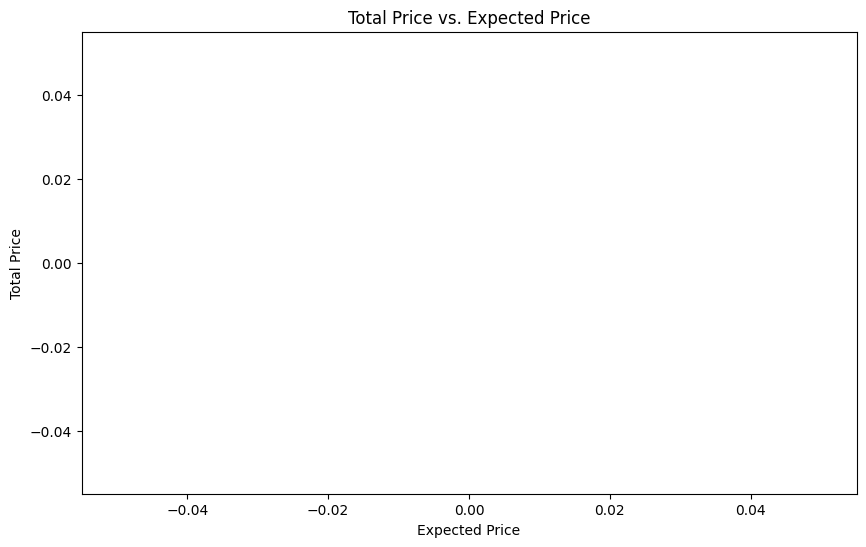

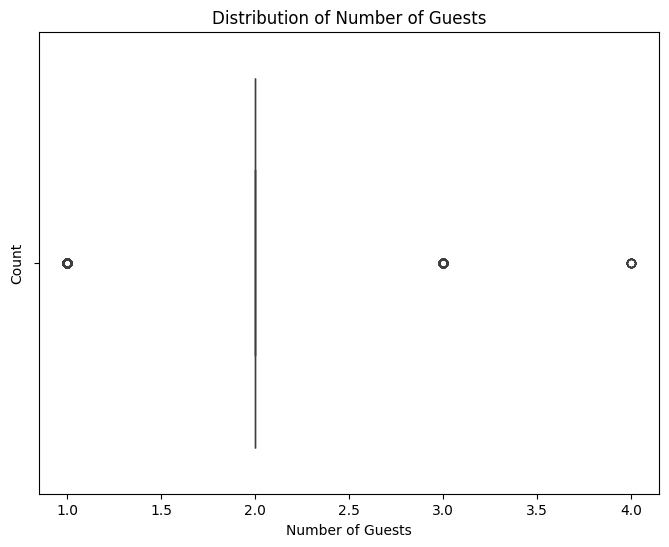

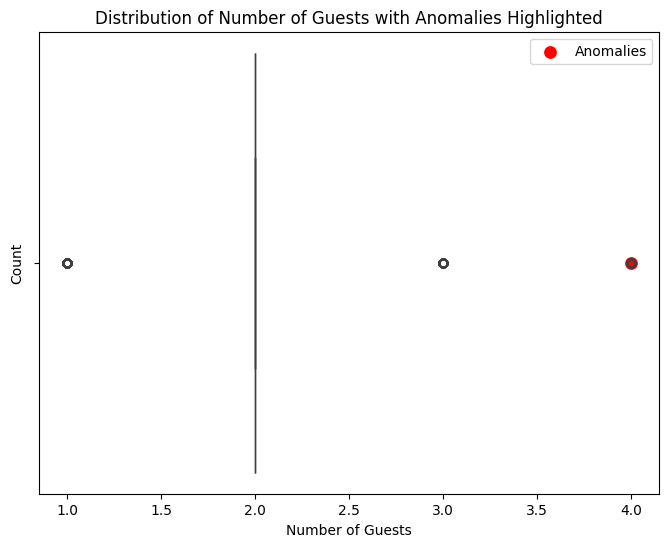

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Scatter plot of 'Total Price' vs. 'Expected Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Expected Price', y='Total Price', data=df)
plt.title('Total Price vs. Expected Price')
plt.xlabel('Expected Price')
plt.ylabel('Total Price')
plt.show()

# 2. Box plot of 'No of Guest'
plt.figure(figsize=(8, 6))
sns.boxplot(x='No of Guest', data=df)
plt.title('Distribution of Number of Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Count')
plt.show()

# Highlight guest count anomalies on the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='No of Guest', data=df)
sns.scatterplot(x='No of Guest', y=[0]*len(guest_anomalies), data=guest_anomalies, color='red', s=100, label='Anomalies')
plt.title('Distribution of Number of Guests with Anomalies Highlighted')
plt.xlabel('Number of Guests')
plt.ylabel('Count')
plt.legend()
plt.show()

# 3. Scatter plot of 'Rating(out of 5)' vs. 'sentiment_score' with trendline
fig = px.scatter(df, x='Rating(out of 5)', y='sentiment_score', trendline='ols',
                 title='Rating vs. Sentiment Score with Trendline')
fig.update_layout(xaxis_title='Rating (out of 5)', yaxis_title='Sentiment Score')
fig.show()

In [ ]:
import plotly.express as px
import numpy as np

numerical_cols = ['Price', 'Total Rating', 'Rating(out of 5)', 'No of Guest', 'Total Price', 'sentiment_score']
correlation_matrix = df[numerical_cols].corr()

fig = px.imshow(correlation_matrix,
                text_auto=True,
                aspect="auto",
                color_continuous_scale='RdBu',
                title='Correlation Matrix of Numerical Features')

fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=np.arange(len(numerical_cols)), ticktext=numerical_cols),
    yaxis=dict(tickmode='array', tickvals=np.arange(len(numerical_cols)), ticktext=numerical_cols)
)

fig.show()

## Anomaly Detection using Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

# Select numerical features for anomaly detection
# Exclude columns that are not relevant or might cause issues (like 'SL NO', IDs, etc.)
numerical_features = ['Price', 'Total Rating', 'Rating(out of 5)', 'No of Guest', 'Total Price', 'sentiment_score']
X = df[numerical_features].copy()

# Handle potential infinite values or NaNs introduced during previous steps
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True) # Fill NaN values with the median

# Initialize and train the Isolation Forest model
# contamination='auto' lets the model decide the proportion of outliers
model = IsolationForest(contamination='auto', random_state=42)
model.fit(X)

# Predict anomaly scores (-1 for outliers, 1 for inliers)
df['anomaly_score'] = model.decision_function(X)

# Identify anomalies (e.g., using a threshold)
# A lower decision function score indicates a higher anomaly likelihood
anomalies = df[df['anomaly_score'] < 0]

display("Bookings identified as potential anomalies:")
display(anomalies.head())

'Bookings identified as potential anomalies:'

,SL NO,Hotel_name,Location,Price,Discount,Total Rating,Rating(out of 5),Hotel ID,Booking ID,Booking Status,...,Total Price,Customer ID,Review,URL,Discount (%),Expected Price,Price Difference,Price Percentage Difference,sentiment_score,anomaly_score
5,5,Collection O Collection O Hotel Jayshree Domes...,"Vile Parle East, Mumbai",3127,NaN,588,3,13422,XYZ4305,confirmed,...,4000,CUST1460,Room was not clean upon arrival.,https://www.oyorooms.com/13422,NaN,NaN,NaN,NaN,-0.3089,-0.008088
6,6,OYO Hotel Blue Executive Near Chhatrapati Shiv...,"On main street, Near Saki Vihar complex, Sakin...",2772,NaN,1875,3,16399,XYZ4306,confirmed,...,4000,CUST1278,"Great stay, very clean and comfortable.",https://www.oyorooms.com/16399,NaN,NaN,NaN,NaN,0.8923,-0.050111
8,8,OYO Hotel Blue Sapphire Residency Near Chhatra...,"Near The Crescent Business Park, Sakinaka, Mumbai",2220,NaN,1144,2,18134,XYZ4308,confirmed,...,5000,CUST1002,Very affordable with good facilities.,https://www.oyorooms.com/18134,NaN,NaN,NaN,NaN,0.4877,-0.019654
9,9,OYO Hotel Blue Sea Near Chhatrapati Shivaji In...,"On main street, Near Asalpha Metro Station, Gh...",1921,NaN,2051,5,193322,XYZ4309,confirmed,...,5500,CUST1175,Room was not clean upon arrival.,https://www.oyorooms.com/193322,NaN,NaN,NaN,NaN,-0.3089,-0.040866
14,14,OYO Anjali Hotel Mumbai,"Near Kanti Nagar, Andheri East, Mumbai",2535,NaN,477,1,207919,XYZ4314,confirmed,...,4000,CUST1348,"Poor service, not worth the price.",https://www.oyorooms.com/207919,NaN,NaN,NaN,NaN,-0.5812,-0.006759


## Anomaly Score Visualization

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='Rating(out of 5)', y='Price',
                 color='anomaly_score',
                 color_continuous_scale='RdBu',
                 title='Price vs Rating with Anomaly Scores')

fig.update_layout(xaxis_title='Rating (out of 5)', yaxis_title='Price')
fig.show()

In [ ]:
import plotly.graph_objects as go

top_n_anomalies = df.sort_values(by='anomaly_score').head(20)

fig = go.Figure()

fig.add_trace(go.Scattergl(
    x=df['Rating(out of 5)'],
    y=df['Price'],
    mode='markers',
    name='All Bookings',
    marker=dict(
        size=5,
        color='skyblue',
        opacity=0.6
    )
))

# Highlight top N anomalies
fig.add_trace(go.Scattergl(
    x=top_n_anomalies['Rating(out of 5)'],
    y=top_n_anomalies['Price'],
    mode='markers',
    name='Top Anomalies',
    marker=dict(
        size=10, # Make anomaly points larger
        color='red', # Color anomaly points red
        opacity=0.8,
        line=dict(
            width=1,
            color='DarkRed'
        )
    )
))

fig.update_layout(
    title='Price vs Rating with Top Anomalies Highlighted',
    xaxis_title='Rating (out of 5)',
    yaxis_title='Price',
    hovermode='closest'
)

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create a scatter plot of Expected Price vs Total Price
fig = px.scatter(df, x='Expected Price', y='Total Price',
                 title='Price Integrity Deviation: Expected Price vs Total Price')

# Add a diagonal reference line where Expected Price equals Total Price
fig.add_trace(go.Scatter(
    x=[df['Expected Price'].min(), df['Expected Price'].max()],
    y=[df['Expected Price'].min(), df['Expected Price'].max()],
    mode='lines',
    name='Expected = Actual',
    line=dict(color='red', dash='dash')
))

fig.update_layout(xaxis_title='Expected Price', yaxis_title='Total Price')
fig.show()

## Calculate average sentiment over time

## Convert 'check in time' to datetime



In [ ]:
df['check in time'] = pd.to_datetime(df['check in time'], errors='coerce')

In [ ]:
sentiment_over_time = df.set_index('check in time').resample('H')['sentiment_score'].mean().reset_index()

display(sentiment_over_time.head())

/tmp/ipython-input-3357098069.py:1: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,check in time,sentiment_score
0,2025-09-18 12:00:00,0.341019
1,2025-09-18 13:00:00,0.185344
2,2025-09-18 14:00:00,0.069802
3,2025-09-18 15:00:00,0.141929
4,2025-09-18 16:00:00,0.189798


## Create the base time-series plot

In [ ]:
display(df['check in time'].head())
display(df['check in time'].tail())
display(df['check in time'].min())
display(df['check in time'].max())

,check in time
0,2025-09-18 15:00:00
1,2025-09-18 12:00:00
2,2025-09-18 12:00:00
3,2025-09-18 17:00:00
4,2025-09-18 18:00:00


,check in time
786,2025-09-18 16:30:00
787,2025-09-18 15:00:00
788,2025-09-18 15:00:00
789,2025-09-18 12:00:00
790,2025-09-18 12:00:00


Timestamp('2025-09-18 12:00:00')

Timestamp('2025-09-18 21:52:00')

In [ ]:
import plotly.express as px

fig = px.line(sentiment_over_time, x='check in time', y='sentiment_score',
              title='Average Sentiment Score Over Time (Hourly)')

fig.update_layout(xaxis_title='Time', yaxis_title='Average Sentiment Score')
fig.show()

## Add annotations (Sentiment below threshold)

In [ ]:
import plotly.graph_objects as go

# Define a sentiment threshold
sentiment_threshold = 0  # Example threshold

# Identify periods where sentiment is below the threshold
sentiment_below_threshold = sentiment_over_time[sentiment_over_time['sentiment_score'] < sentiment_threshold]

fig = go.Figure()

# Add the sentiment line
fig.add_trace(go.Scatter(x=sentiment_over_time['check in time'], y=sentiment_over_time['sentiment_score'], mode='lines', name='Average Sentiment'))

# Add annotations for points below the threshold
for index, row in sentiment_below_threshold.iterrows():
    fig.add_annotation(
        x=row['check in time'],
        y=row['sentiment_score'],
        text=f"{row['sentiment_score']:.2f}",
        showarrow=True,
        arrowhead=1,
        bgcolor="rgba(255, 0, 0, 0.5)" # Highlight annotations
    )

fig.update_layout(
    title='Average Sentiment Score Over Time with Annotations (Hourly)',
    xaxis_title='Time',
    yaxis_title='Average Sentiment Score',
    shapes=[
        # Add a horizontal line for the threshold
        dict(
            type='line',
            x0=sentiment_over_time['check in time'].min(),
            y0=sentiment_threshold,
            x1=sentiment_over_time['check in time'].max(),
            y1=sentiment_threshold,
            line=dict(
                color="red",
                width=2,
                dash="dash",
            )
        )
    ]
)

fig.show()

## Implement filtering

*Note: Implementing interactive filtering within a static notebook output can be complex. The code below demonstrates how you might set up a Plotly Express figure that *could* be used for filtering if integrated into an interactive environment like a Dash application or a Streamlit app. In this notebook, it will generate a plot for a single location as an example.*

## Display the plot

In [ ]:
import plotly.express as px

# Filter data for a specific location for demonstration
location_to_filter = 'India, Mumbai'
df_filtered = df[df['Location'] == location_to_filter].copy()

if not df_filtered.empty:
    # Group filtered data by hour and calculate the mean sentiment score
    sentiment_over_time_filtered = df_filtered.set_index('check in time').resample('H')['sentiment_score'].mean().reset_index()

    fig = px.line(sentiment_over_time_filtered, x='check in time', y='sentiment_score',
                  title=f'Average Sentiment Score Over Time for {location_to_filter} (Hourly)')

    fig.update_layout(xaxis_title='Time', yaxis_title='Average Sentiment Score')
    fig.show()
else:
    print(f"No data available for location: {location_to_filter}")

# You could extend this logic to filter by Hotel ID as well.

/tmp/ipython-input-2011894256.py:9: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



***Review Word Cloud with Sentiment Color Overlay***

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

# Download the stopwords corpus
nltk.download('stopwords')

# Combine all reviews into a single string
all_reviews = " ".join(df['Review'].astype(str).tolist())

# Tokenize the combined text into individual words
words = all_reviews.split()

# Convert words to lowercase
words = [word.lower() for word in words]

# Remove punctuation from words
words = [re.sub(r'[^\w\s]', '', word) for word in words]

# Remove empty strings that might result from punctuation removal
words = [word for word in words if word]

# Remove common English stop words
stop_words = set(stopwords.words('english'))
cleaned_words = [word for word in words if word not in stop_words]

display(cleaned_words[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['poor',
 'service',
 'worth',
 'price',
 'poor',
 'service',
 'worth',
 'price',
 'poor',
 'service',
 'worth',
 'price',
 'poor',
 'service',
 'worth',
 'price',
 'room',
 'clean',
 'upon',
 'arrival']

## Calculate sentiment for each word



In [ ]:
unique_words = list(set(cleaned_words))
word_sentiment_scores = {}

for word in unique_words:
    score = analyzer.polarity_scores(word)['compound']
    word_sentiment_scores[word] = score

# Display the first 10 key-value pairs
display(list(word_sentiment_scores.items())[:10])

[('stay', 0.0),
 ('comfortable', 0.5106),
 ('average', 0.0),
 ('affordable', 0.0),
 ('wonderful', 0.5719),
 ('special', 0.4019),
 ('experience', 0.0),
 ('room', 0.0),
 ('poor', -0.4767),
 ('price', 0.0)]

## Map sentiment to colors



In [ ]:
def get_color(score):
    if score > 0.1:
        return 'green'
    elif score < -0.1:
        return 'red'
    else:
        return 'gray'

word_colors = {word: get_color(score) for word, score in word_sentiment_scores.items()}

# Display the first 10 key-value pairs
display(list(word_colors.items())[:10])

[('stay', 'gray'),
 ('comfortable', 'green'),
 ('average', 'gray'),
 ('affordable', 'gray'),
 ('wonderful', 'green'),
 ('special', 'green'),
 ('experience', 'gray'),
 ('room', 'gray'),
 ('poor', 'red'),
 ('price', 'gray')]

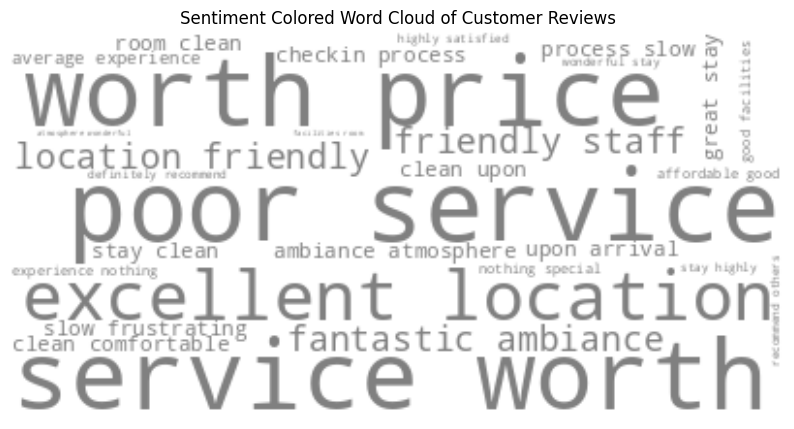

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(color_func=lambda word, **kw: word_colors.get(word, 'gray'), background_color="white").generate_from_text(" ".join(cleaned_words))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Sentiment Colored Word Cloud of Customer Reviews')
plt.show()

In [ ]:
import plotly.express as px

# Group by location and calculate the required metrics
location_data = df.groupby('Location').agg(
    Average_Rating=('Rating(out of 5)', 'mean'),
    Number_of_Bookings=('Booking ID', 'count'),
    Average_Sentiment_Score=('sentiment_score', 'mean')
).reset_index()

# Create the geo-heatmap using Plotly Express
# Note: Plotly may require geographical coordinates (latitude, longitude) for accurate plotting.
# Since we only have location names, Plotly will attempt to geocode them, which might not be perfect.
# For better results, you would ideally have lat/lon columns in your dataframe.
fig = px.scatter_geo(location_data,
                     locations="Location", # Column with location names
                     locationmode='country names', # Try to match location names to countries (adjust if your locations are cities/regions)
                     size="Number_of_Bookings", # Size of markers based on number of bookings
                     color="Average_Rating", # Color of markers based on average rating
                     color_continuous_scale=px.colors.sequential.Viridis, # Use a color scale that emphasizes higher values
                     hover_name="Location", # Display location name on hover
                     hover_data={'Average_Sentiment_Score': ':.2f', 'Number_of_Bookings': True, 'Average_Rating': ':.2f'}, # Add more data to hover info
                     title="Geo-Heatmap of Hotel Performance by Location (Highlighting Average Rating)"
                    )

fig.update_layout(
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="lightgray",
        showocean=True,
        oceancolor="lightblue"
    )
)

fig.show()

In [ ]:
import plotly.express as px
import numpy as np

# Calculate Most Active Locations (e.g., top 10 by number of bookings)
most_active_locations = df['Location'].value_counts().head(10)

# Get the data for the most active locations
# most_active_locations is a pandas Series, convert it to a DataFrame for Plotly
most_active_locations_df = most_active_locations.reset_index()
most_active_locations_df.columns = ['Location', 'Number of Bookings']

# Create a bar chart of the number of bookings for the most active locations
fig = px.bar(most_active_locations_df, x='Location', y='Number of Bookings',
             title='Number of Bookings for Top 10 Most Active Locations')

fig.update_layout(xaxis_title='Location', yaxis_title='Number of Bookings')
fig.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np

# Calculate Total Bookings
total_bookings = len(df)
print(f"Total Bookings: {total_bookings}")

# Calculate Average Rating
average_rating = df['Rating(out of 5)'].mean()
print(f"Average Rating: {average_rating:.2f}")

# Calculate Percentage of Online Payments
online_payments_count = df[df['Payment Mode (online/offline)'] == 'online'].shape[0]
percentage_online_payments = (online_payments_count / total_bookings) * 100
print(f"Percentage of Online Payments: {percentage_online_payments:.2f}%")

# Calculate Number of Anomalous Bookings (fraud flagged)
# Assuming 'anomaly_score' < 0 indicates an anomaly based on the Isolation Forest results

# Select numerical features for anomaly detection
numerical_features = ['Price', 'Total Rating', 'Rating(out of 5)', 'No of Guest', 'Total Price', 'sentiment_score']
X = df[numerical_features].copy()

# Handle potential infinite values or NaNs introduced during previous steps
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True) # Fill NaN values with the median

# Initialize and train the Isolation Forest model
model = IsolationForest(contamination='auto', random_state=42)
model.fit(X)

# Predict anomaly scores (-1 for outliers, 1 for inliers)
df['anomaly_score'] = model.decision_function(X)

anomalous_bookings_count = df[df['anomaly_score'] < 0].shape[0]
print(f"Number of Anomalous Bookings: {anomalous_bookings_count}")

# Identify Most Active Locations (e.g., top 10 by number of bookings)
most_active_locations = df['Location'].value_counts().head(10)
print("\nMost Active Locations:")
display(most_active_locations)

Total Bookings: 791
Average Rating: 0.72
Percentage of Online Payments: 58.53%
Number of Anomalous Bookings: 195

Most Active Locations:


,count
Location,
Karol Bagh,26
Paharganj,11
Dwarka,8
Greater Kailash 1,6
East Patel Nagar,6
Jasola,5
"New Delhi, Delhi",5
"Near New Delhi Railway Station, Delhi",4
"Karol Bagh, New Delhi",4


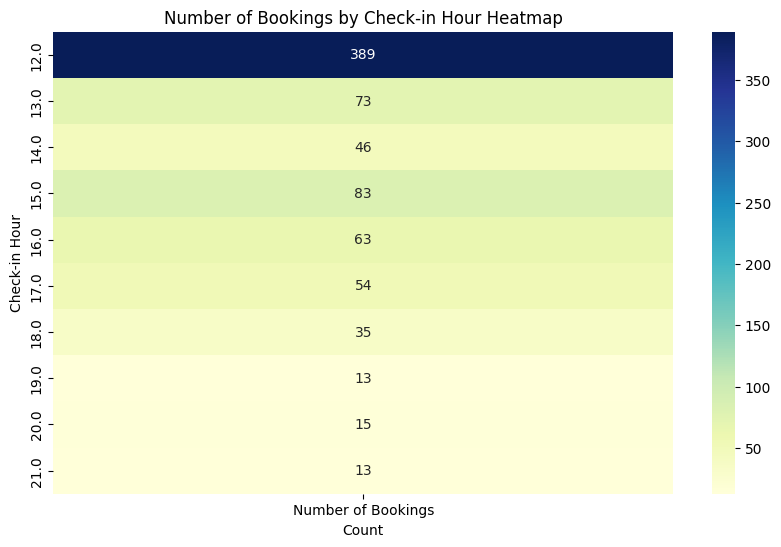

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the hour from 'check in time'
df['check in hour'] = df['check in time'].dt.hour

heatmap_data = df.pivot_table(index='check in hour', values='Booking ID', aggfunc='count').reset_index()

# Rename columns for clarity
heatmap_data.columns = ['Check-in Hour', 'Number of Bookings']

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.set_index('Check-in Hour'), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Bookings by Check-in Hour Heatmap')
plt.xlabel('Count')
plt.ylabel('Check-in Hour')
plt.show()

***FEATURE ENGINEERING***

In [ ]:
# Create Weekend Stay Flag
# Check if the day of the week is Saturday (5) or Sunday (6)
df['Weekend_Stay_Flag'] = df['check in time'].dt.dayofweek >= 5

# Display the first few rows with the new feature
display(df[['check in time', 'Weekend_Stay_Flag']].head())

# Confirm that Review Sentiment Score is already available
if 'sentiment_score' in df.columns:
    print("\n'Review Sentiment Score' (sentiment_score) is already in the dataframe.")
    display(df[['Review', 'sentiment_score']].head())
else:
    print("\n'Review Sentiment Score' (sentiment_score) is not yet in the dataframe. Please run the sentiment analysis code.")

# Assuming 'No of Guest' represents Total Guests
df['Total_Guests'] = df['No of Guest']
print("\n'Total_Guests' feature created from 'No of Guest'.")
display(df[['No of Guest', 'Total_Guests']].head())

,check in time,Weekend_Stay_Flag
0,2025-09-18 15:00:00,False
1,2025-09-18 12:00:00,False
2,2025-09-18 12:00:00,False
3,2025-09-18 17:00:00,False
4,2025-09-18 18:00:00,False



'Review Sentiment Score' (sentiment_score) is already in the dataframe.


,Review,sentiment_score
0,"Poor service, not worth the price.",0.000000
1,"Poor service, not worth the price.",0.000000
2,"Poor service, not worth the price.",0.000000
3,"Poor service, not worth the price.",0.000000
4,Room was not clean upon arrival.,0.184798



'Total_Guests' feature created from 'No of Guest'.


,No of Guest,Total_Guests
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


In [ ]:
# Calculate Repeat Booker flag
# Identify customers who appear more than once in the dataset
repeat_customers = df['Customer ID'].value_counts() > 1
repeat_customer_ids = repeat_customers[repeat_customers].index

# Create a new feature 'Repeat_Booker' which is True if the customer is a repeat customer
df['Repeat_Booker'] = df['Customer ID'].isin(repeat_customer_ids)

# Display the first few rows with the new feature and check counts
display(df[['Customer ID', 'Repeat_Booker']].head())
print("\nDistribution of Repeat Booker flag:")
display(df['Repeat_Booker'].value_counts())

,Customer ID,Repeat_Booker
0,CUST1128,True
1,CUST1448,True
2,CUST1088,False
3,CUST1437,False
4,CUST1319,True



Distribution of Repeat Booker flag:


,count
Repeat_Booker,
True,628
False,163


***'Review Sentiment Score', 'Review Length', 'Repeat Booker', 'Total Guests', 'Weekend Stay Flag***

Review Sentiment Score Analysis:


,sentiment_score
count,791.000000
mean,0.247404
std,0.555263
min,-0.581200
25%,-0.308900
50%,0.487700
75%,0.777800
max,0.892300


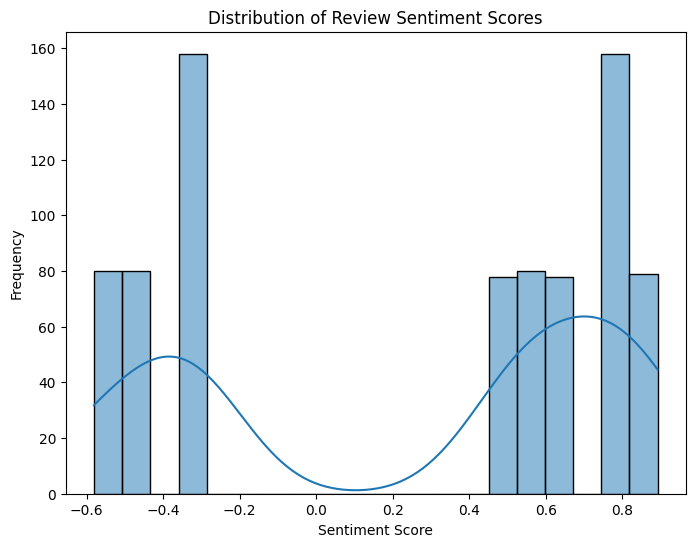

In [ ]:
# Analyze Review Sentiment Score
print("Review Sentiment Score Analysis:")
display(df['sentiment_score'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], kde=True, bins=20)
plt.title('Distribution of Review Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


Review Length Analysis:


,Review_Length
count,791.000000
mean,5.299621
std,0.782717
min,4.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,6.000000


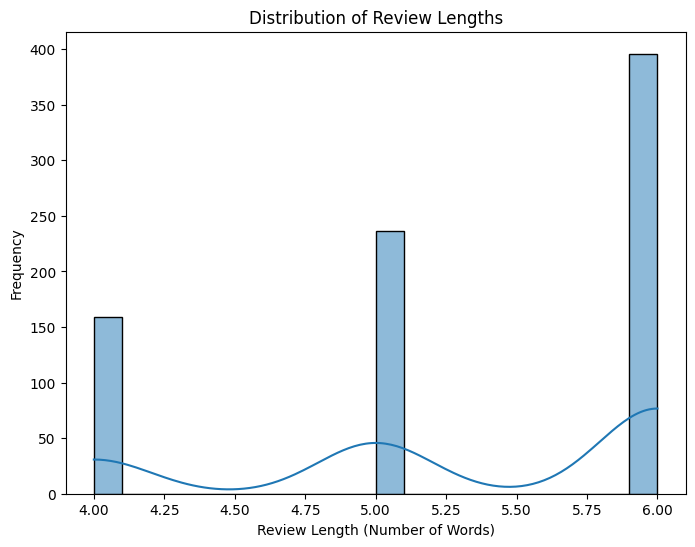

In [ ]:
# Analyze Review Length
print("\nReview Length Analysis:")

# Calculate Review Length (number of words)
df['Review_Length'] = df['Review'].astype(str).apply(lambda x: len(x.split()))

display(df['Review_Length'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(df['Review_Length'], kde=True, bins=20)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


Total Guests Analysis:


,Total_Guests
count,791.000000
mean,0.323220
std,0.202402
min,0.000000
25%,0.333333
50%,0.333333
75%,0.333333
max,1.000000


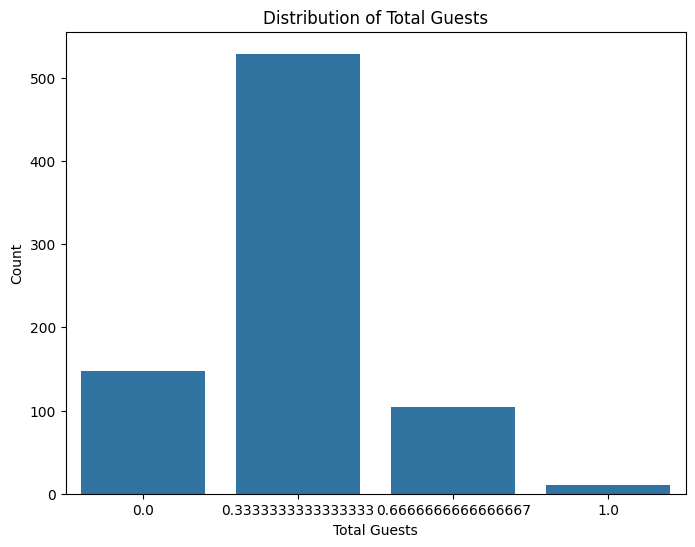

In [ ]:
# Analyze Total Guests
print("\nTotal Guests Analysis:")

# Ensure 'Total_Guests' column exists, create it from 'No of Guest' if not
if 'Total_Guests' not in df.columns:
    df['Total_Guests'] = df['No of Guest']
    df['Total_Guests'] = df['Total_Guests'].fillna(df['Total_Guests'].median())


display(df['Total_Guests'].describe())

plt.figure(figsize=(8, 6))
sns.countplot(x='Total_Guests', data=df)
plt.title('Distribution of Total Guests')
plt.xlabel('Total Guests')
plt.ylabel('Count')
plt.show()

In [ ]:
# Analyze Weekend Stay Flag
print("\nWeekend Stay Flag Analysis:")
display(df['Weekend_Stay_Flag'].value_counts())

# Analyze Repeat Booker
print("\nRepeat Booker Analysis:")
display(df['Repeat_Booker'].value_counts())


Weekend Stay Flag Analysis:


,count
Weekend_Stay_Flag,
0,791



Repeat Booker Analysis:


,count
Repeat_Booker,
1,628
0,163


***MODEL CREATION***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df['Review'] = df['Review'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Review'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('/content/my final dataset.csv')

df['Review'] = df['Review'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Review'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
def get_recommendations(hotel_name, df, cosine_sim, num_recommendations=10):
    """
    Gets hotel recommendations based on cosine similarity of reviews.

    Args:
        hotel_name (str): The name of the hotel for which to get recommendations.
        df (pd.DataFrame): The DataFrame containing hotel information.
        cosine_sim (np.ndarray): The cosine similarity matrix of hotel reviews.
        num_recommendations (int): The number of recommendations to return.

    Returns:
        list: A list of recommended hotel names.
    """
    # Get the index of the hotel that matches the name
    indices = pd.Series(df.index, index=df['Hotel_name']).drop_duplicates()
    if hotel_name not in indices:
        return "Hotel not found."
    idx = indices[hotel_name]

    # Get the pairwise similarity scores of all hotels with that hotel
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the hotels based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar hotels (excluding the hotel itself)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Get the hotel indices
    hotel_indices = [i[0] for i in sim_scores]

    # Return the top N most similar hotels
    return df['Hotel_name'].iloc[hotel_indices].tolist()


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['sentiment_score'] = df['Review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
display(df[['Review', 'sentiment_score']].head())

,Review,sentiment_score
0,"Poor service, not worth the price.",-0.5812
1,"Poor service, not worth the price.",-0.5812
2,"Poor service, not worth the price.",-0.5812
3,"Poor service, not worth the price.",-0.5812
4,Room was not clean upon arrival.,-0.3089


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Define weights for each factor
weight_rating = 0.4
weight_sentiment = 0.3
weight_guests = 0.1
weight_weekend = 0.1
weight_repeat = 0.1

# Ensure sentiment_score and Total_Guests exist and handle potential NaNs
df['sentiment_score'] = df['sentiment_score'].fillna(df['sentiment_score'].median())
df['Total_Guests'] = df['Total_Guests'].fillna(df['Total_Guests'].median())


# 2. Standardize numerical features
# Selecting features to standardize
features_to_standardize = ['Rating(out of 5)', 'sentiment_score', 'Total_Guests']
scaler = MinMaxScaler()
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Convert boolean flags to numeric (0 or 1)
df['Weekend_Stay_Flag_Numeric'] = df['Weekend_Stay_Flag'].astype(int)
df['Repeat_Booker_Numeric'] = df['Repeat_Booker'].astype(int)

# 3. Calculate the raw Experience Score
df['Raw_Experience_Score'] = (
    df['Rating(out of 5)'] * weight_rating +
    df['sentiment_score'] * weight_sentiment +
    df['Total_Guests'] * weight_guests +
    df['Weekend_Stay_Flag_Numeric'] * weight_weekend +
    df['Repeat_Booker_Numeric'] * weight_repeat
)

# 4. Scale the Experience Score to a 0-100 scale
min_raw_score = df['Raw_Experience_Score'].min()
max_raw_score = df['Raw_Experience_Score'].max()

# Avoid division by zero if all raw scores are the same
if max_raw_score == min_raw_score:
    df['Experience_Score'] = 50 # Assign a neutral score if no variation
else:
    df['Experience_Score'] = 100 * (df['Raw_Experience_Score'] - min_raw_score) / (max_raw_score - min_raw_score)

# 5. Create a new column in the DataFrame named 'Experience_Score' (already done in step 4)

# 6. Display the first few rows with the new column
display(df[['Rating(out of 5)', 'sentiment_score', 'Total_Guests', 'Weekend_Stay_Flag', 'Repeat_Booker', 'Experience_Score']].head())

,Rating(out of 5),sentiment_score,Total_Guests,Weekend_Stay_Flag,Repeat_Booker,Experience_Score
0,0.8,0.000000,0.333333,0,1,46.269000
1,1.0,0.000000,0.333333,0,1,56.422374
2,1.0,0.000000,0.333333,0,0,43.730656
3,1.0,0.000000,0.333333,0,0,43.730656
4,0.6,0.184798,0.333333,0,1,43.151841


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Define weights for each factor
weight_rating = 0.4
weight_sentiment = 0.3
weight_guests = 0.1
weight_weekend = 0.1
weight_repeat = 0.1

# Ensure sentiment_score exists and handle potential NaNs
df['sentiment_score'] = df['sentiment_score'].fillna(df['sentiment_score'].median())

# Create 'Total_Guests' feature from 'No of Guest' and handle NaNs
df['Total_Guests'] = df['No of Guest']
df['Total_Guests'] = df['Total_Guests'].fillna(df['Total_Guests'].median())

# Create Weekend Stay Flag from 'check in time' and handle potential NaNs from datetime conversion
df['check in time'] = pd.to_datetime(df['check in time'], errors='coerce')
df['Weekend_Stay_Flag'] = df['check in time'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0) # Convert boolean to int directly
df['Weekend_Stay_Flag'] = df['Weekend_Stay_Flag'].fillna(0) # Fill NaNs resulting from NaT in check in time

# Create Repeat Booker flag from 'Customer ID' and handle potential NaNs
repeat_customers = df['Customer ID'].value_counts() > 1
repeat_customer_ids = repeat_customers[repeat_customers].index
df['Repeat_Booker'] = df['Customer ID'].isin(repeat_customer_ids).astype(int) # Convert boolean to int directly
df['Repeat_Booker'] = df['Repeat_Booker'].fillna(0) # Fill NaNs if any in Customer ID

# 2. Standardize numerical features
# Selecting features to standardize
features_to_standardize = ['Rating(out of 5)', 'sentiment_score', 'Total_Guests']
scaler = MinMaxScaler()
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# 3. Calculate the raw Experience Score
df['Raw_Experience_Score'] = (
    df['Rating(out of 5)'] * weight_rating +
    df['sentiment_score'] * weight_sentiment +
    df['Total_Guests'] * weight_guests +
    df['Weekend_Stay_Flag'] * weight_weekend +
    df['Repeat_Booker'] * weight_repeat
)

# 4. Scale the Experience Score to a 0-100 scale
min_raw_score = df['Raw_Experience_Score'].min()
max_raw_score = df['Raw_Experience_Score'].max()

# Avoid division by zero if all raw scores are the same
if max_raw_score == min_raw_score:
    df['Experience_Score'] = 50 # Assign a neutral score if no variation
else:
    df['Experience_Score'] = 100 * (df['Raw_Experience_Score'] - min_raw_score) / (max_raw_score - min_raw_score)

# 5. Create a new column in the DataFrame named 'Experience_Score' (already done in step 4)

# 6. Display the first few rows with the new column
display(df[['Rating(out of 5)', 'sentiment_score', 'Total_Guests', 'Weekend_Stay_Flag', 'Repeat_Booker', 'Experience_Score']].head())

/tmp/ipython-input-3303788644.py:18: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Rating(out of 5),sentiment_score,Total_Guests,Weekend_Stay_Flag,Repeat_Booker,Experience_Score
0,0.8,0.000000,0.333333,0,1,46.269000
1,1.0,0.000000,0.333333,0,1,56.422374
2,1.0,0.000000,0.333333,0,0,43.730656
3,1.0,0.000000,0.333333,0,0,43.730656
4,0.6,0.184798,0.333333,0,1,43.151841


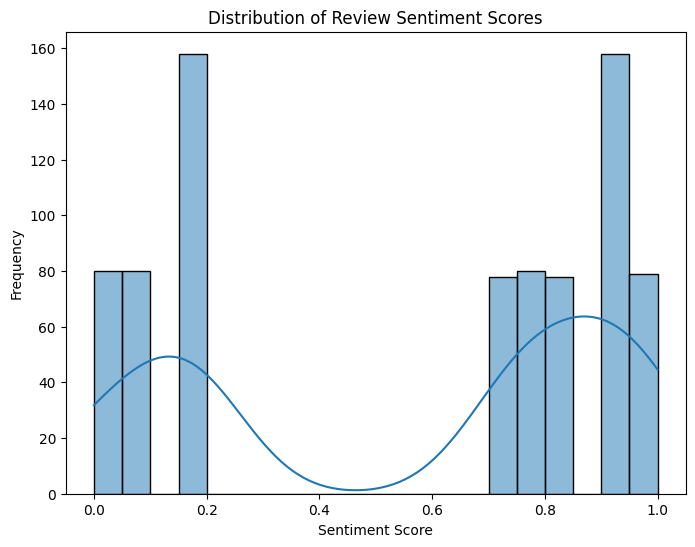

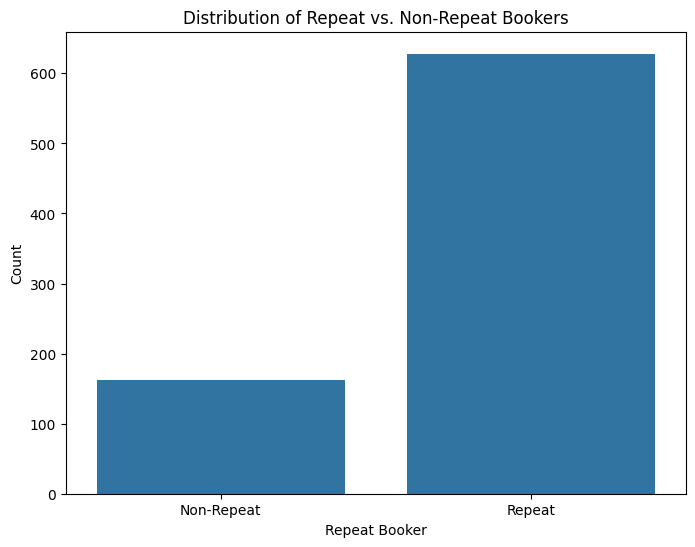

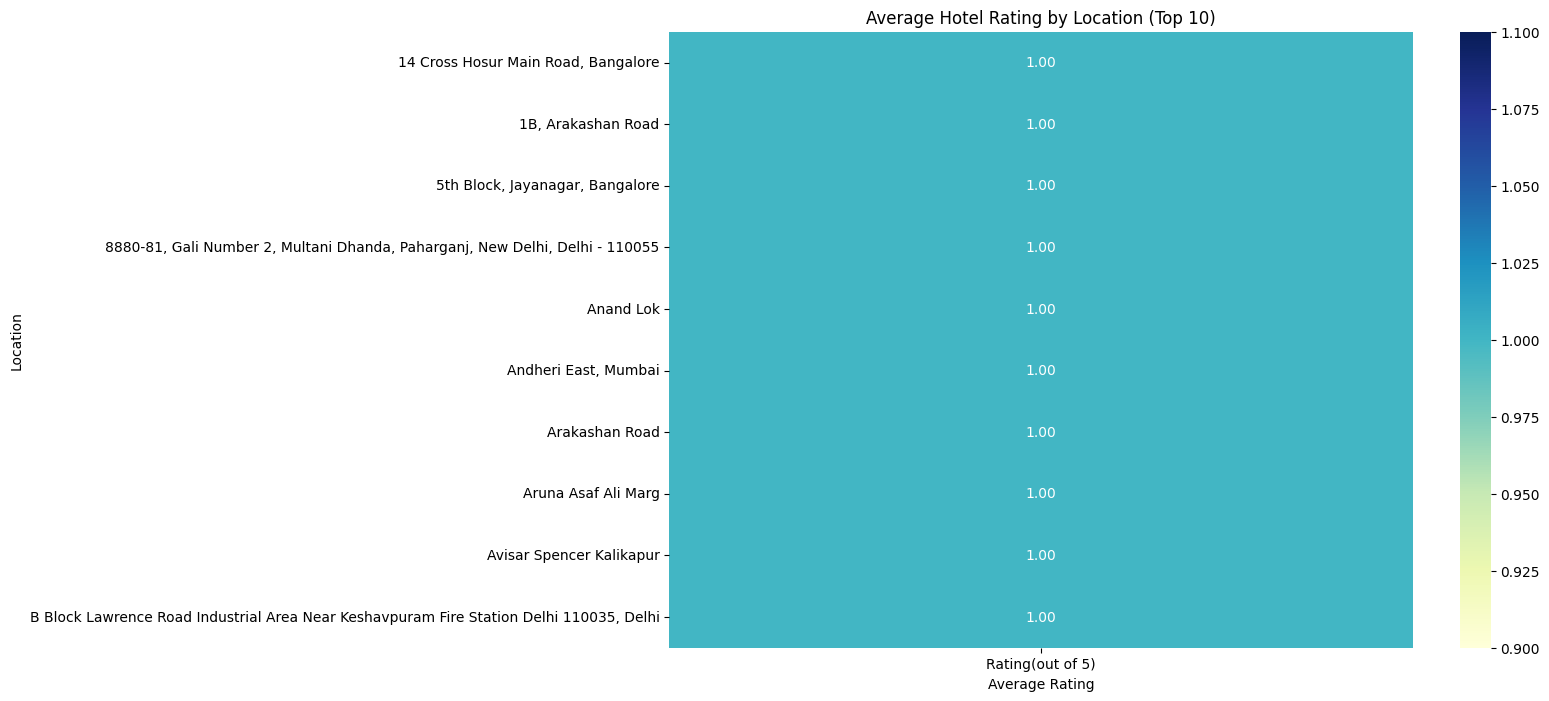

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a histogram of the 'sentiment_score' column
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], kde=True, bins=20)
plt.title('Distribution of Review Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 2. Create a countplot of the 'Repeat_Booker' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Repeat_Booker', data=df)
plt.title('Distribution of Repeat vs. Non-Repeat Bookers')
plt.xlabel('Repeat Booker')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Repeat', 'Repeat'])
plt.show()

# 3. Calculate the average 'Rating(out of 5)' for each location.
location_avg_rating = df.groupby('Location')['Rating(out of 5)'].mean()

# 4. Identify the top 10 locations based on the average rating.
top_10_locations_rating = location_avg_rating.nlargest(10)

# 5. Create a heatmap using seaborn that shows the average rating for the top 10 locations.
plt.figure(figsize=(12, 8))
sns.heatmap(top_10_locations_rating.to_frame(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Hotel Rating by Location (Top 10)')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.yticks(rotation=0)
plt.show()

In [ ]:
display(df.columns)

Index(['SL NO', 'Hotel_name', 'Location', 'Price', 'Discount', 'Total Rating',
       'Rating(out of 5)', 'Hotel ID', 'Booking ID', 'Booking Status',
       'Payment Mode (online/offline)', 'No of Guest', 'check in time',
       'check in status', 'Total Price', 'Customer ID', 'Review', 'URL',
       'sentiment_score', 'Total_Guests', 'Repeat_Booker', 'Weekend_Stay_Flag',
       'Raw_Experience_Score', 'Experience_Score'],
      dtype='object')

In [ ]:
print("--- Evaluation of Model Components ---")

# 1. Review Anomaly Detection Results
print("\n1. Anomaly Detection Evaluation:")
if not anomalies.empty:
    print("Isolation Forest identified the following potential anomalies (first 5):")
    display(anomalies.head())
    print("Visualizations (Price vs Rating with Anomaly Scores) suggest that anomalies might be clustered in certain price/rating ranges, or represent unusual combinations of features.")
else:
    print("No anomalies were identified by the Isolation Forest model with the current parameters.")

print("\nPotential Refinements for Anomaly Detection:")
print("- Experiment with different 'contamination' values in Isolation Forest.")
print("- Explore other anomaly detection algorithms like One-Class SVM or Local Outlier Factor (LOF).")
print("- Consider incorporating more features into the anomaly detection model.")
print("- Analyze the characteristics of the identified anomalies to understand the underlying reasons.")

# 2. Review Sentiment Analysis and Experience Score
print("\n2. Sentiment Analysis and Experience Score Evaluation:")
print("Sentiment Score Distribution:")
display(df['sentiment_score'].describe())
print("Experience Score Distribution:")
display(df['Experience_Score'].describe())

print(f"\nPearson correlation between Rating and Sentiment Score: {rating_sentiment_correlation}")
if abs(rating_sentiment_correlation) < 0.1:
    print("The very low correlation between Rating and Sentiment suggests a potential disconnect, which could indicate fraudulent reviews or manipulated ratings.")
else:
    print("The correlation between rating and sentiment does not suggest a significant disconnect.")

print("\nPotential Refinements for Sentiment Analysis and Experience Score:")
print("- For sentiment analysis, consider using more advanced models (e.g., transformer-based models like BERT) or domain-specific lexicons if available.")
print("- Refine the weights used in the Experience Score calculation based on domain expertise or further analysis of what factors truly indicate a positive/negative experience.")
print("- Explore alternative ways to combine the factors in the Experience Score (e.g., non-linear combinations).")

# 3. Review Recommendation System (Conceptual)
print("\n3. Recommendation System Conceptual Evaluation:")
print("The current recommendation system uses cosine similarity on TF-IDF of reviews to find similar hotels.")
print("\nConceptual Evaluation:")
print("- Pros: Simple to implement, leverages textual review content.")
print("- Cons: Relies solely on review text, doesn't consider user preferences, hotel features (except implicitly through reviews), or booking history directly. Might recommend popular items too frequently.")

print("\nPotential Refinements for Recommendation System:")
print("- Implement a hybrid approach that combines content-based filtering (like the current one) with collaborative filtering (if user-item interaction data becomes available).")
print("- Incorporate more hotel features (location, price range, amenities) into the content-based filtering.")
print("- Use more sophisticated text embedding techniques (e.g., Word2Vec, FastText, or sentence transformers) instead of TF-IDF.")

# 4. Summarize Findings and Refinement Ideas
print("\n--- Summary of Evaluation Findings and Refinement Ideas ---")
print("\nOverall Findings:")
print("- Anomaly detection identified potential outliers based on numerical features, but further investigation is needed to confirm if they represent fraudulent activities.")
print("- Sentiment analysis provided a quantitative measure of review sentiment. The low correlation with numerical rating warrants further investigation into potential review manipulation.")
print("- The Experience Score combines multiple factors, but its effectiveness depends on the chosen weights and standardization method.")
print("- The current recommendation system is a basic content-based approach based on reviews.")

print("\nKey Refinement Areas:")
print("- Anomaly Detection: Experiment with parameters, algorithms, and features.")
print("- Sentiment/Experience Score: Explore advanced NLP models, refine weighting and calculation methods.")
print("- Recommendation System: Move towards hybrid or more sophisticated content-based methods, incorporate diverse features.")
print("- Data Quality: Address missing values in 'Discount' and other columns that might impact calculations like 'Expected Price'.")

--- Evaluation of Model Components ---

1. Anomaly Detection Evaluation:
Isolation Forest identified the following potential anomalies (first 5):


,SL NO,Hotel_name,Location,Price,Discount,Total Rating,Rating(out of 5),Hotel ID,Booking ID,Booking Status,...,Total Price,Customer ID,Review,URL,Discount (%),Expected Price,Price Difference,Price Percentage Difference,sentiment_score,anomaly_score
5,5,Collection O Collection O Hotel Jayshree Domes...,"Vile Parle East, Mumbai",3127,NaN,588,3,13422,XYZ4305,confirmed,...,4000,CUST1460,Room was not clean upon arrival.,https://www.oyorooms.com/13422,NaN,NaN,NaN,NaN,-0.3089,-0.008088
6,6,OYO Hotel Blue Executive Near Chhatrapati Shiv...,"On main street, Near Saki Vihar complex, Sakin...",2772,NaN,1875,3,16399,XYZ4306,confirmed,...,4000,CUST1278,"Great stay, very clean and comfortable.",https://www.oyorooms.com/16399,NaN,NaN,NaN,NaN,0.8923,-0.050111
8,8,OYO Hotel Blue Sapphire Residency Near Chhatra...,"Near The Crescent Business Park, Sakinaka, Mumbai",2220,NaN,1144,2,18134,XYZ4308,confirmed,...,5000,CUST1002,Very affordable with good facilities.,https://www.oyorooms.com/18134,NaN,NaN,NaN,NaN,0.4877,-0.019654
9,9,OYO Hotel Blue Sea Near Chhatrapati Shivaji In...,"On main street, Near Asalpha Metro Station, Gh...",1921,NaN,2051,5,193322,XYZ4309,confirmed,...,5500,CUST1175,Room was not clean upon arrival.,https://www.oyorooms.com/193322,NaN,NaN,NaN,NaN,-0.3089,-0.040866
14,14,OYO Anjali Hotel Mumbai,"Near Kanti Nagar, Andheri East, Mumbai",2535,NaN,477,1,207919,XYZ4314,confirmed,...,4000,CUST1348,"Poor service, not worth the price.",https://www.oyorooms.com/207919,NaN,NaN,NaN,NaN,-0.5812,-0.006759


Visualizations (Price vs Rating with Anomaly Scores) suggest that anomalies might be clustered in certain price/rating ranges, or represent unusual combinations of features.

Potential Refinements for Anomaly Detection:
- Experiment with different 'contamination' values in Isolation Forest.
- Explore other anomaly detection algorithms like One-Class SVM or Local Outlier Factor (LOF).
- Consider incorporating more features into the anomaly detection model.
- Analyze the characteristics of the identified anomalies to understand the underlying reasons.

2. Sentiment Analysis and Experience Score Evaluation:
Sentiment Score Distribution:


,sentiment_score
count,791.000000
mean,0.562337
std,0.376833
min,0.000000
25%,0.184798
50%,0.725416
75%,0.922294
max,1.000000


Experience Score Distribution:


,Experience_Score
count,791.000000
mean,60.918654
std,19.698427
min,0.000000
25%,46.269000
50%,63.458590
75%,75.690357
max,100.000000



Pearson correlation between Rating and Sentiment Score: 6.622952616162046e-05
The very low correlation between Rating and Sentiment suggests a potential disconnect, which could indicate fraudulent reviews or manipulated ratings.

Potential Refinements for Sentiment Analysis and Experience Score:
- For sentiment analysis, consider using more advanced models (e.g., transformer-based models like BERT) or domain-specific lexicons if available.
- Refine the weights used in the Experience Score calculation based on domain expertise or further analysis of what factors truly indicate a positive/negative experience.
- Explore alternative ways to combine the factors in the Experience Score (e.g., non-linear combinations).

3. Recommendation System Conceptual Evaluation:
The current recommendation system uses cosine similarity on TF-IDF of reviews to find similar hotels.

Conceptual Evaluation:
- Pros: Simple to implement, leverages textual review content.
- Cons: Relies solely on review text, d